In [1]:
%load_ext autoreload
%autoreload 2
#%matplotlib tk

In [2]:
import matplotlib.pyplot as plt
import os
import os.path
import numpy as np
import math
import Optimization_Convergence_Plotter
import Optimization_Shape_Plotter
import Optimization_Gradient_Plotter

## Setup

In [3]:
# Absolute path to the directory with all the optimization results
CONST_OPTIMIZATION_DIR_ABS_PATH = "/Users/jm-034232/Documents/McGill/Research/DPGSolver/build_2D/output/optimization/euler/steady/NURBS_Airfoil/Constrained_TargetCL/TestsReference"


In [4]:
# Absolute path to the directory to save the output files (plots)
CONST_figure_output_directory = ""


In [8]:
# The files to read. The first file holds the convergence data, the second holds the shape profile
# and the third holds the gradient.

CONST_File_list = [
    
    ("Optimization_Convergence.txt", 
     "Optimized_NURBS_Patch.txt",
     "Objective_Gradient.txt", 
     "Target CL Reference Test, NURBS Metrics", "r", "-", ".", True),

]

## Convergence Plots
The following consists of plots of the convergence of the cost function and its gradient's L2 norm as 
a function of design iterations and CPU time. Additional plots that are optionally included are the 
convergence of the lift coefficient and pitching moment.

In [9]:
file_convergence_data = []

for data_tuple in CONST_File_list:
    convergence_file_abs_path = os.path.join(CONST_OPTIMIZATION_DIR_ABS_PATH, data_tuple[0])
    conv_data = Optimization_Convergence_Plotter.read_convergence_file(convergence_file_abs_path)

    file_convergence_data.append(conv_data)

### Cost Function vs. Design Iterations and CPU Time

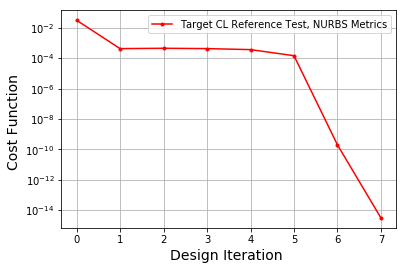

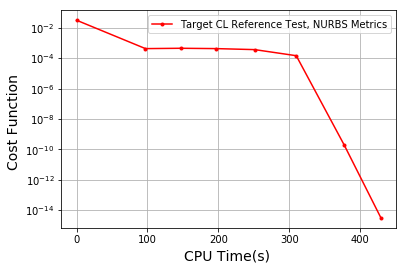

In [10]:

# log(Objective) Convergence vs. Iteration
plt.figure(1)
Optimization_Convergence_Plotter.add_convergence_plot(CONST_File_list, file_convergence_data, "Design_Iteration", 
                                                      "Cost_Function", True)
#plt.savefig(os.path.join(CONST_figure_output_directory, "cost_vs_iteration_Pall.pdf"))

# log(Objective) Convergence vs. CPU time
plt.figure(2)
Optimization_Convergence_Plotter.add_convergence_plot(CONST_File_list, file_convergence_data, "CPU_Time(s)", 
                                                      "Cost_Function", True)


### Gradient of Cost Function L2 Norm vs Design Iterations and CPU Time

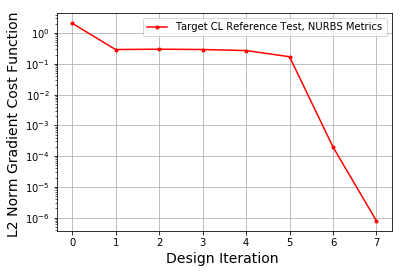

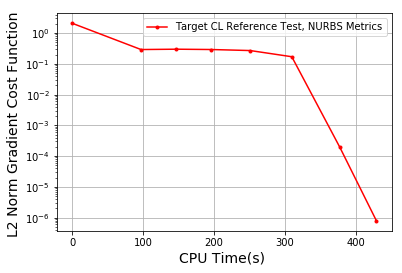

In [11]:
# log(Gradient) Convergence vs. Iteration
plt.figure(1)
Optimization_Convergence_Plotter.add_convergence_plot(CONST_File_list, file_convergence_data, "Design_Iteration", 
                                                      "L2_Norm_Gradient_Cost_Function", True)
#plt.savefig(os.path.join(CONST_figure_output_directory, "grad_vs_iteration_Pall.pdf"))

# log(Gradient) Convergence vs. CPU time
plt.figure(2)
Optimization_Convergence_Plotter.add_convergence_plot(CONST_File_list, file_convergence_data, "CPU_Time(s)", 
                                                      "L2_Norm_Gradient_Cost_Function", True)



### Lift Coefficient vs Design Iterations and CPU Time

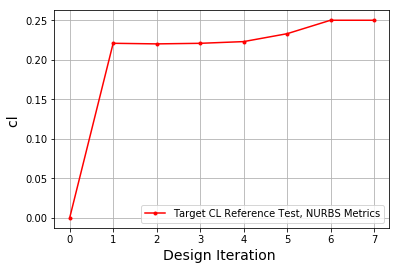

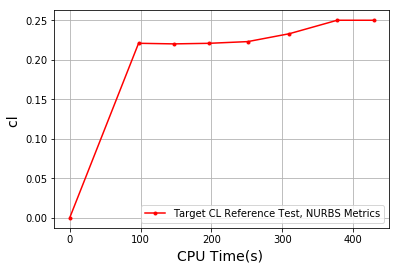

In [14]:
# CL Convergence vs. Iteration
plt.figure(1)
Optimization_Convergence_Plotter.add_convergence_plot(CONST_File_list, file_convergence_data, "Design_Iteration", 
                                                      "cl")
#plt.savefig(os.path.join(CONST_figure_output_directory, "grad_vs_iteration_Pall.pdf"))

# CL Convergence vs. CPU time
plt.figure(2)
Optimization_Convergence_Plotter.add_convergence_plot(CONST_File_list, file_convergence_data, "CPU_Time(s)", 
                                                      "cl")

### Pitching Moment Coefficient vs Design Iterations and CPU Time

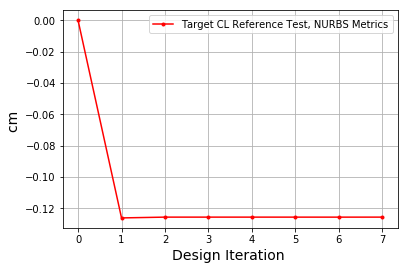

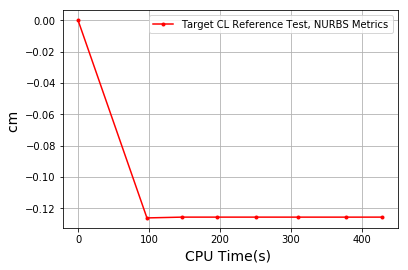

In [15]:
# CM Convergence vs. Iteration
plt.figure(1)
Optimization_Convergence_Plotter.add_convergence_plot(CONST_File_list, file_convergence_data, "Design_Iteration", 
                                                      "cm")
#plt.savefig(os.path.join(CONST_figure_output_directory, "grad_vs_iteration_Pall.pdf"))

# CM Convergence vs. CPU time
plt.figure(2)
Optimization_Convergence_Plotter.add_convergence_plot(CONST_File_list, file_convergence_data, "CPU_Time(s)", 
                                                      "cm")

## Shape Plots
Plots of the initial and final optimized airfoil

### Setup

In [16]:

# Additional files to plot shapes for (for instance, this may store the reference shapes 
# for the optimization). Note that some file names will be None in order to mimic the file format
# from CONST_File_list.

# To get the initial airfoil profile, check the control file and look to see what geometry file (.geo) file was run

CONST_Additional_File_list = [
    (None, "/Users/jm-034232/Documents/McGill/Research/DPGSolver/input/input_files/euler/steady/NURBS_Airfoil/geometry_parameters_NACA0012_targetCL_tests_reference.geo", None, "Initial Profile", "k", "--", ".", False), # Initial Airfoil
]


In [17]:
# Plot Range (to use for the Airfoil case)
CONST_PLOT_X_RANGE = [-0.65, 0.65]
CONST_PLOT_Y_RANGE = [-0.125, 0.125]


In [18]:
# The points (on the knot domain) to plot
CONST_Airfoil_NURBS_Domain_pts = []
t_vals = np.linspace(-1., 1., 100)
for t in t_vals:
    CONST_Airfoil_NURBS_Domain_pts.append((t, -1.))
    

In [19]:
# Load the file patch data (which describes the geometry)
file_patch_data = []

for data_tuple in CONST_File_list:

    file_abs_path = os.path.join(CONST_OPTIMIZATION_DIR_ABS_PATH, data_tuple[1])
    patch_info = Optimization_Shape_Plotter.read_Patch_file(file_abs_path)

    file_patch_data.append(patch_info)
    

In [20]:
# Load the additional file patch data
file_additional_patch_data = []

for data_tuple in CONST_Additional_File_list:

    file_abs_path = os.path.join(CONST_OPTIMIZATION_DIR_ABS_PATH, data_tuple[1])
    patch_info = Optimization_Shape_Plotter.read_Patch_file(file_abs_path)

    file_additional_patch_data.append(patch_info)
    

### Geometry Plots

(-0.125, 0.125)

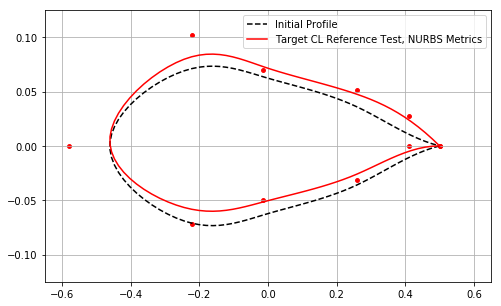

In [21]:

# Plot the geometry
plt.figure(figsize=(8, 5))

# Plot some additional reference profiles
for case_index in range(len(CONST_Additional_File_list)):
    
    # Get the patch information
    patch_data = file_additional_patch_data[case_index]
    case_data_tuple = CONST_Additional_File_list[case_index]
    Optimization_Shape_Plotter.plot_patch_points(patch_data, case_data_tuple, CONST_Airfoil_NURBS_Domain_pts)

    
# Plot the optimized geometries
for case_index in range(len(CONST_File_list)):
    
    # Get the patch information
    patch_data = file_patch_data[case_index]
    case_data_tuple = CONST_File_list[case_index]
    Optimization_Shape_Plotter.plot_patch_points(patch_data, case_data_tuple, CONST_Airfoil_NURBS_Domain_pts)

    
plt.legend()
plt.grid()

plt.gca().set_xlim(CONST_PLOT_X_RANGE)
plt.gca().set_ylim(CONST_PLOT_Y_RANGE)

#plt.savefig(os.path.join(CONST_figure_output_directory, "optimized_shapes_Pall.pdf"))